# Dirac in Coulomb Potential

In [107]:
import matplotlib, matplotlib.pyplot as plt
import scipy, scipy.special as sp
import seaborn as sns
import numpy as np
import numpy.linalg as npl
import math
import os
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
from scipy.linalg import solve,pinv,null_space,inv
import torch

In [108]:
lim=50
P=int(1e3)
r=np.array([x for x in np.linspace(0,lim,P) if x!=0])
me=0.510 #in Mev
m=139.57039 #in Mev
c=1
hbar=1
Z=1
e0=-1.602e-19
alpha=1/(137.035999084)

In [109]:
k=-1
E=0.5
M=m+0.5*(E+(Z*alpha)/r)

In [110]:
def gequ(r):
    N=P-1
    dr=2*lim/N
    g2p = diags([-2., 1., 1.], [0,-1, 1], shape=(N, N))/dr**2
    coefgp=(2/r)-(Z*alpha/2*M*r**2)
    gp=coefgp*(diags([1., -1.], [0,-1], shape=(N, N))/(2*dr))
    g=(((Z*alpha/r)+E)-(k*(k+1)/(2*M*r**2))+(k+1)*(Z*alpha)/(4*M**2*r**3))*2*M
    return np.array(g2p+gp+g)

In [111]:
def null(A, eps=1e-15):
    u, s, vh = np.linalg.svd(A)
    null_space = np.compress(s <= eps, vh, axis=0)
    return null_space.T

In [112]:
b=np.zeros(P-1)

In [113]:
gs=gequ(r)

In [114]:
g=null(gs)
g

array([], shape=(999, 0), dtype=float64)

In [115]:
eigen_vals, eigen_vects = np.linalg.eig(gs)

In [116]:
eig=[i for i in eigen_vals if abs(i)<1e-2]
eig

[-0.0039399370632850345, -0.008060252168703866]

In [117]:
gs.shape

(999, 999)

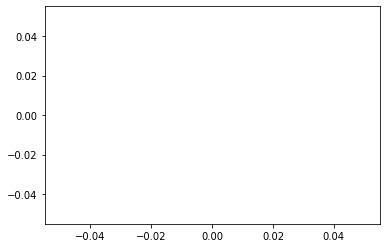

In [118]:
plt.plot(r,g)
plt.show()